## データ読み込み＆前処理

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("test.csv")

In [4]:
date_int = df["対象年月日"]

year = date_int.astype(str).str[0:4]
month = date_int.astype(str).str[4:6]
day = date_int.astype(str).str[6:8]
time = df["時間"].astype(str)

date_int2 = year + "-" + month + "-" + day + " " + time + ":00:00"
date = pd.to_datetime(date_int2)
date = date.rename("date")
df = pd.concat([df, date], axis=1)
df = df.drop(df.columns[3:4], axis=1)
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["dayofweek"] = df["date"].dt.dayofweek
df["時間"] = time.astype(int)


In [5]:
df = df.replace({'dayofweek': {0: "月", 1: "火", 2: "水", 3: "木", 4: "金", 5: "土", 6: "日"}})

In [6]:
df["NoC"] = df["着信呼数"].apply(lambda x: int(x.replace(",", "")) if type(x) is str else float(x))

In [7]:
df["NoAC"] = df["放棄呼数"].apply(lambda x: int(x.replace(",", "")) if type(x) is str else float(x))

In [8]:
test = df.set_index("date")
test_4 = test[test.index.month == 4]

## 4月データ＿時間別NoC（sum）

In [9]:
test_4_1 = test_4.groupby(["時間","組織名称"]).sum()
test_4_1 = test_4_1.reset_index()
test_4_1 = test_4_1.sort_values('時間', ascending=True)

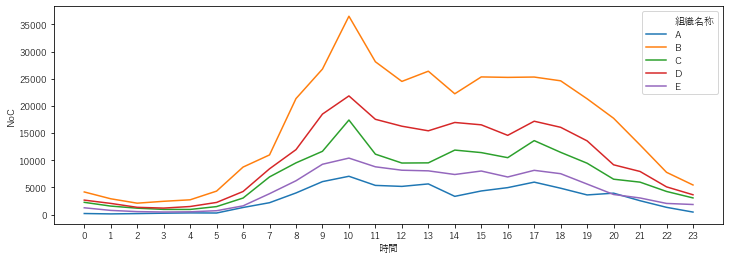

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

plt.figure(figsize=(12,4)) 

g = sns.lineplot(x="時間", y="NoC",hue="組織名称", data=test_4_1, markers=True, dashes=True)
plt.xticks(np.arange(0, 24, 1.0))
plt.show()
g = g.get_figure()

## 4月データ＿時間別NoAC（sum）

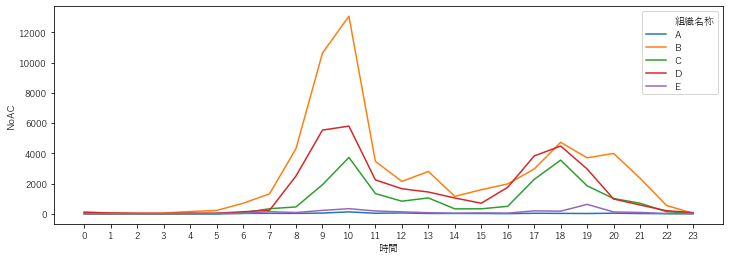

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

plt.figure(figsize=(12,4)) 

g = sns.lineplot(x="時間", y="NoAC",hue="組織名称", data=test_4_1, markers=True, dashes=True)
plt.xticks(np.arange(0, 24, 1.0))
plt.show()
g = g.get_figure()

## 4月データ＿時間別NoC（mean）

In [12]:
test_4_2 = test_4.groupby(["時間","組織名称"]).mean()
test_4_2 = test_4_2.reset_index()

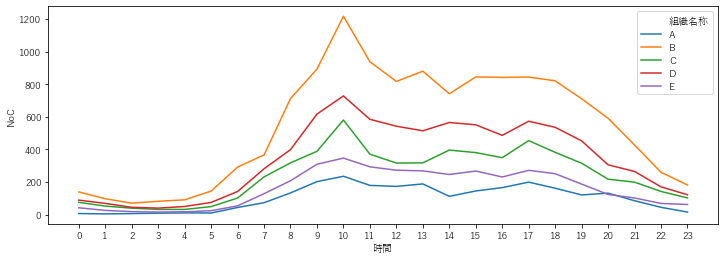

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

plt.figure(figsize=(12,4)) 

g = sns.lineplot(x="時間", y="NoC",hue="組織名称", data=test_4_2, markers=True, dashes=True)
plt.xticks(np.arange(0, 24, 1.0))
plt.show()
g = g.get_figure()

## 4月データ＿時間別NoAC（mean）

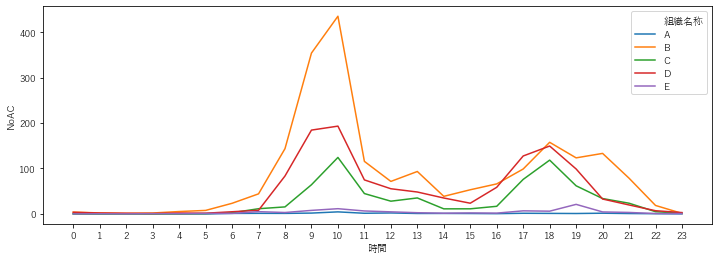

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

plt.figure(figsize=(12,4)) 

g = sns.lineplot(x="時間", y="NoAC",hue="組織名称", data=test_4_2, markers=True, dashes=True)
plt.xticks(np.arange(0, 24, 1.0))
plt.show()
g = g.get_figure()

## 4月データ＿日別NoC（sum）

In [15]:
test_4_3 = test_4.groupby([pd.Grouper(freq='D'),"dayofweek","組織名称"]).sum()
test_4_3 = test_4_3.reset_index()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


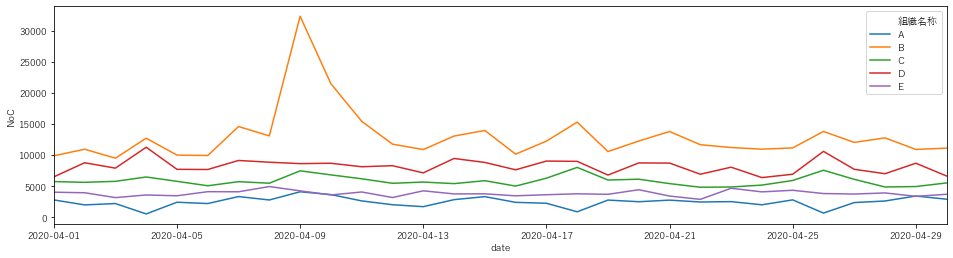

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.figure(figsize=(16,4)) 

g = sns.lineplot(x="date", y="NoC",hue="組織名称", data=test_4_3)
g.set_xlim(datetime(2020,4,1), datetime(2020,4,30)) # 範囲指定
plt.show()

## 4月データ＿曜日別NoC(sum)

In [17]:
test_4_4 = test_4.groupby([pd.Grouper(freq='D'),"dayofweek","組織名称"]).sum()
test_4_4 = test_4_4.reset_index()

In [18]:
k = ["月", "火", "水", "木", "金", "土", "日"]

test_4_4 = test_4_4.groupby(["dayofweek","組織名称"], as_index=False).sum()

test_4_4["order"] = test_4_4["dayofweek"].apply(lambda x: k.index(x) if x in k else -1)

test_4_4 = test_4_4.sort_values(["order", "組織名称"]).reset_index(drop=True).drop("order", axis=1)

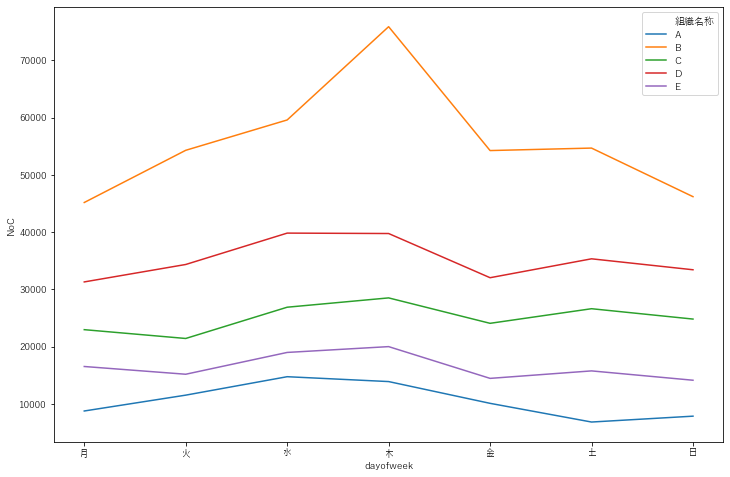

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.figure(figsize=(12,8)) 
g = sns.lineplot(x="dayofweek", y="NoC",hue="組織名称", data=test_4_4, sort=False)
plt.show()

In [20]:
def CRR(row):
    return (row["NoC"] - row["NoAC"])*100/row["NoC"]

In [21]:
test_4_5 = test_4_1
test_4_5["RR"] = test_4_1.apply(CRR, axis=1)

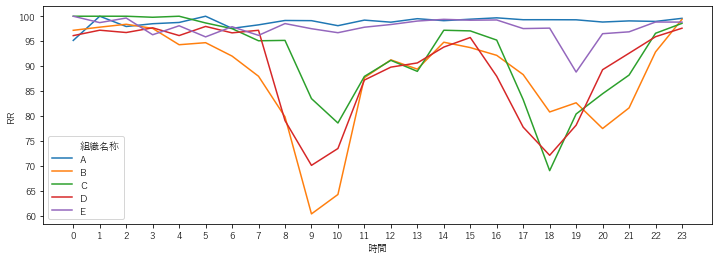

In [22]:
plt.figure(figsize=(12,4)) 

g = sns.lineplot(x="時間", y="RR",hue="組織名称", data=test_4_5, markers=True, dashes=True)
plt.xticks(np.arange(0, 24, 1.0))
plt.show()